In [2]:
!pip install ultralytics --quiet
!pip install opencv-python --quiet
!pip install matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.2 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_src = '/content/drive/MyDrive/archive(6)/food11/train'
test_src  = '/content/drive/MyDrive/archive(6)/food11/test'

In [6]:
output_dir = '/content/food11-small-YOLO'

In [7]:
from ultralytics import YOLO
import os
import shutil
from pathlib import Path
import random

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
classes = ['apple_pie','cheesecake','chicken_curry','french_fries','fried_rice',
           'hamburger','hot_dog','ice_cream','omelette','pizza','sushi']

In [9]:
train_num = 40
val_num   = 10

In [10]:
paths = [
    Path(output_dir)/'images'/'train',
    Path(output_dir)/'images'/'val',
    Path(output_dir)/'labels'/'train',
    Path(output_dir)/'labels'/'val'
]

In [11]:

for p in paths:
    p.mkdir(parents=True, exist_ok=True)

In [12]:
dataset_dir = "fastfood_dataset"
os.makedirs(dataset_dir, exist_ok=True)

In [13]:
def copy_images(src_folder, dst_img_folder, dst_lbl_folder, num_images):
    for cls_id, cls_name in enumerate(classes):
        cls_path = os.path.join(src_folder, cls_name)
        all_imgs = [f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg','.png'))]
        selected_imgs = random.sample(all_imgs, min(num_images, len(all_imgs)))

        for img in selected_imgs:
            # Copy image
            src_img = os.path.join(cls_path, img)
            dst_img = os.path.join(dst_img_folder, img)
            shutil.copy(src_img, dst_img)

            # Create YOLO label (full-image box)
            label_file = os.path.join(dst_lbl_folder, os.path.splitext(img)[0]+'.txt')
            with open(label_file,'w') as f:
                f.write(f"{cls_id} 0.5 0.5 1.0 1.0\n")

In [14]:
# Copy train images and labels
copy_images(train_src, paths[0], paths[2], train_num)
# Copy validation images and labels
copy_images(test_src, paths[1], paths[3], val_num)

print("custom small YOLO dataset ready!")

custom small YOLO dataset ready!


In [15]:
yaml_path = os.path.join(output_dir, 'dataset.yaml')
with open(yaml_path, 'w') as f:
    f.write(f"path: {output_dir}\n")
    f.write("train: images/train\n")
    f.write("val: images/val\n")
    f.write(f"nc: {len(classes)}\n")
    f.write(f"names: {classes}\n")

print("dataset.yaml created!")


✅ dataset.yaml created!


In [16]:
model = YOLO("yolov8n.pt")

In [17]:
# Train model
model.train(
    data=yaml_path,
    epochs=25,
    imgsz=416,
    batch=8,
    project='food11-YOLO-results',
    name='yolov8-food'
)

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/food11-small-YOLO/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8-food, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ad63f4f6ba0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

In [35]:
val_img_dir = os.path.join(output_dir, 'images', 'val')
sample_img = os.path.join(val_img_dir, os.listdir(val_img_dir)[0])


image 1/1 /content/food11-small-YOLO/images/val/107518.jpg: 320x416 1 apple_pie, 1 hot_dog, 173.7ms
Speed: 7.0ms preprocess, 173.7ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 416)


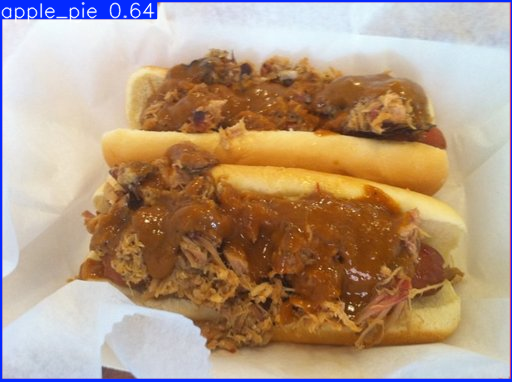

In [36]:
results = model.predict(sample_img)
results[0].show()

In [25]:
save_dir = '/content/food11-predictions'
os.makedirs(save_dir, exist_ok=True)



In [37]:
from ultralytics import YOLO
model = YOLO("yolov8n-cls.pt")